<a href="https://colab.research.google.com/github/jdxxmahmud/mahdy-sir-re-acad-course/blob/main/Phase%201/Individual%20Assignments/Recorded%20Classes%20Notes/Deep%20Learning/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [42]:
# Sequential API to create models
from keras.models import Sequential

# Components to create a model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

# Stochastic Gradient Descent Algorithm
from keras.optimizers import SGD

# Keras already hosted MSIST dataset for us
from keras.datasets import mnist

# An keras utility to binarize integers
from keras.utils import to_categorical

# An keras utility to visualize model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of its utilities
from skimage.io import imshow

# For plotting graphs
import matplotlib.pyplot as plt

# Another python library to manipulate vectors, matrices, arrays etc
import numpy as np


### Hyperparameters Parameters

In [43]:
batch_size = 128  # Batch size for training data
nb_classes = 10   # Number of classes in the classification problem, number of classes
nb_epoch = 10     # Number of times for training

### Load Data

In [44]:
# Load MNIST Dataset
# Data split into two sub-set training and test

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Statistics

In [45]:
print(f"Number of Training Samples: {len(X_train)}")
print(f"Number of Associated Labels: {len(y_train)}")

Number of Training Samples: 60000
Number of Associated Labels: 60000


In [46]:
print(f"Shape of Training Data: {X_train.shape}")


Shape of Training Data: (60000, 28, 28)


In [47]:
print(f"Data Type of Training Samples: {X_train.dtype}")


Data Type of Training Samples: uint8


In [48]:
print(f"Number of Test Samples: {len(X_test)}")
print(f"Number of Associated Labels: {len(y_test)}")


Number of Test Samples: 10000
Number of Associated Labels: 10000


In [49]:
print(f"Shape of Training Labels: {y_train.shape}")


Shape of Training Labels: (60000,)


In [50]:
print(f"Shape of Test Data: {X_test.shape}")


Shape of Test Data: (10000, 28, 28)


In [51]:
print(f"Shape of Test Label: {y_test.shape}")  # This is basically a column


Shape of Test Label: (10000,)


### Visualize Data

In [52]:
# A single sample among 60000 samples
X_train[0].shape

(28, 28)

In [53]:
a_random_sample = X_train[0]

# Pixel value of the sample
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

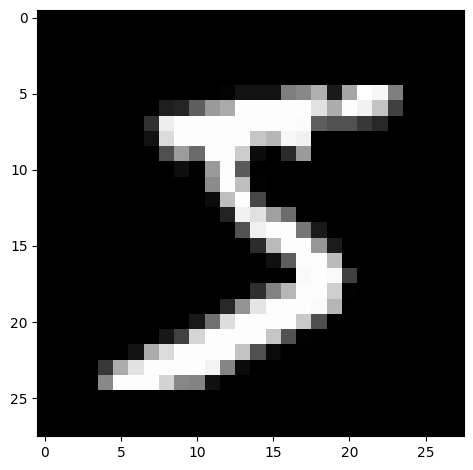

In [54]:
# Show as image

imshow(a_random_sample)

Plotting multiple images

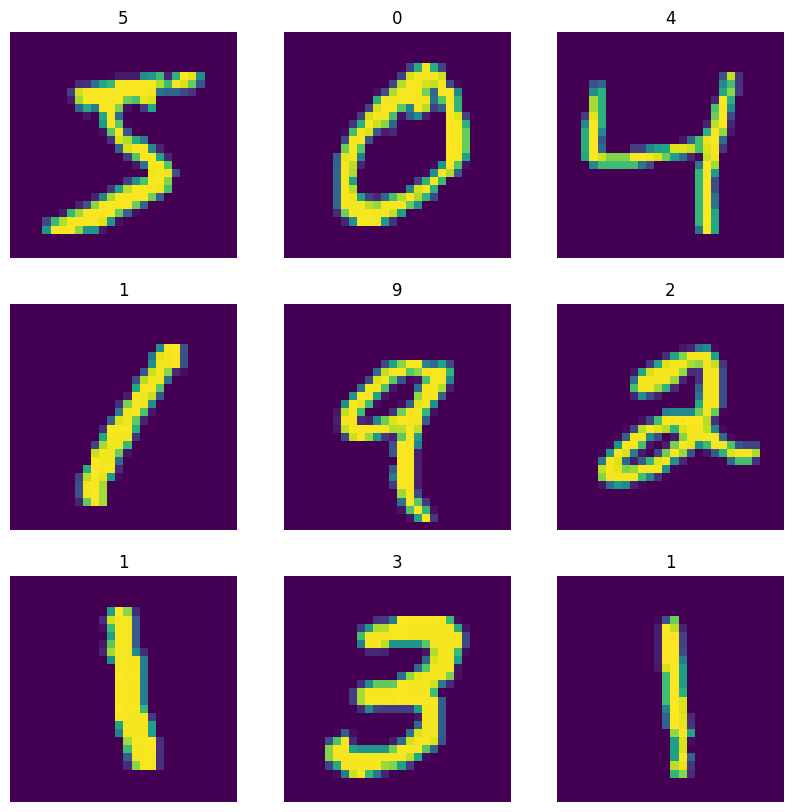

In [55]:
# Define the size of the figure
plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)

  # Get a sample at index i
  one_image = X_train[i]

  # Display the sample
  plt.imshow(one_image)

  # Display the label of the sample as titlt
  plt.title(int(y_train[i]))

  plt.axis("off")

Change datatype of Train and Test Data


In [56]:
print(f"Previous Data Types\n\tTrain Data: {X_train.dtype} \n\tTest Data: {X_test.dtype}")


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


print(f"New Data Types\n\tTrain Data: {X_train.dtype} \n\tTest Data: {X_test.dtype}")

Previous Data Types
	Train Data: uint8 
	Test Data: uint8
New Data Types
	Train Data: float32 
	Test Data: float32


### Rescaling Data

In [57]:
def print_min_max_val_of_sample(rand_sample):

  print(f"Min Value of sample: {rand_sample.min()}")
  print(f"Max Value of sample: {rand_sample.max()}")

In [58]:
print_min_max_val_of_sample(X_train[0])

Min Value of sample: 0.0
Max Value of sample: 255.0


Devide each value in Train and Test Data by 255

In [59]:
X_train /= 255
X_test /= 255

In [60]:
print_min_max_val_of_sample(X_train[0])


Min Value of sample: 0.0
Max Value of sample: 1.0


### Reshape Train and Test Data to 4D

conv2D can not accept images without dimension 4D. So, instead of shrinking, we are expanding the dimensions. For greyscale images, we are adding channel dimension 1 along with the existing information **height** and **width**.

In [61]:
# Make sure images have shape (28, 28, 1)  # This 1 is basically channel information

# We want to expand a dim at the end
X_train = np.expand_dims(X_train, -1)

# We want to expand a dim at the end
X_test = np.expand_dims(X_test, -1)

# Get new shape of Train and Test
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


### Binarize Labels

Display training labels

In [62]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

This is basically a column. So following will be the shape

In [63]:
y_train.shape

(60000,)

### Array to categorial data

In [64]:
input_arr = np.array(range(10))
print(input_arr)
print(f"Input array shape: {input_arr.shape}")

output = to_categorical(input_arr, num_classes = 10)

print(output)
print(f"Output list shape: {output.shape}")

[0 1 2 3 4 5 6 7 8 9]
Input array shape: (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Output list shape: (10, 10)


Applying this to the training and test labels

In [65]:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

### Define Model

Define an input shape for the CNN

In [66]:
input_shape = (28, 28, 1)

We want to create a sequentially stacked model using keras Sequential API

In [67]:
# Multilayer Perceptron Model


model = Sequential()

# Setup input layer
model.add(Input(shape=(input_shape)))

# 1st Conv Layer
model.add(Conv2D(32, kernel_size=(3, 3,), activation = 'relu'))

# 1st Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Layer
model.add(Conv2D(64, kernel_size=(3, 3,), activation = 'relu'))

# 2nd Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 2D tensor to 1D
model.add(Flatten())

# Last Dense Layer to make classification
model.add(Dense(nb_classes, activation = 'softmax'))

### Compile Model

In [68]:
# Choose Learning Rate
learning_rate = 0.001

# Select Optimizer
optimizer = SGD(learning_rate = learning_rate)

# Select loss function
loss = 'categorical_crossentropy'

# Select evaluation metrics
metrics = ['accuracy']

# Model compilation
model.compile(optimizer = optimizer, loss = loss, metrics=metrics)

### Visualize Model

In [69]:
# A summary of inputs, outputs in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

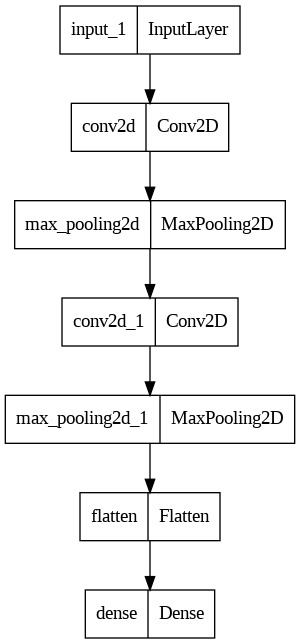

In [70]:
plot_model(model)

### Model Training

In [71]:
# Train
history = model.fit(X_train, Y_train, epochs = nb_epoch, batch_size = batch_size)

Epoch 1/10
469/469 [==============================] - 5s 5ms/step - loss: 2.2856 - accuracy: 0.1377
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 2.1809 - accuracy: 0.4308
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 1.9923 - accuracy: 0.6591
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 1.5778 - accuracy: 0.7434
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0360 - accuracy: 0.7976
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7123 - accuracy: 0.8335
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5636 - accuracy: 0.8566
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4855 - accuracy: 0.8708
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4374 - accuracy: 0.8804
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4046 - accuracy: 0.8871

### Inference on Test Data

In [72]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test)

# Display test Statistics
print(f"Summary: \n\tLoss over the test dataset: {(evaluation[0] * 100):.2f}\n\t Accuracy: {(evaluation[1]* 100):.2f}")



313/313 [==============================] - 1s 3ms/step - loss: 0.3700 - accuracy: 0.8985
Summary: 
	Loss over the test dataset: 37.00
	 Accuracy: 89.85


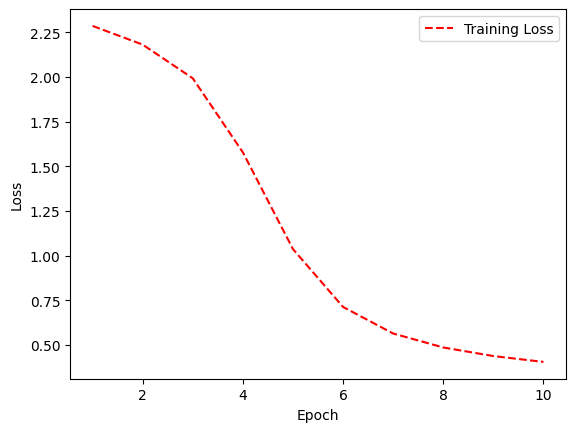

In [73]:
# Get training loss histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

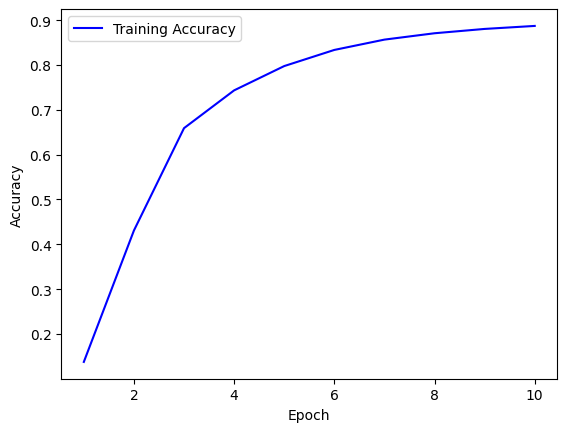

In [74]:
# Get training accuracy histories
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'b-')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();